# 1. Importing Libraries

Importing libraries for:

* Data Manipulation

* Visualization

* Analysis



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# 2. Data Collection

In [3]:
#Main Data(ML case Study.csv)
df = pd.read_csv(r"C:\Internshala\Python_Project\Raw_Data\ML case Study.csv",header=0)

In [4]:
# Tier List (Colleges.csv)
colleges = pd.read_csv(r"C:\Internshala\Python_Project\Raw_Data\Colleges.csv",header=0)

In [5]:
# cities List (cities.csv)
cities = pd.read_csv(r"C:\Internshala\Python_Project\Raw_Data\cities.csv",header=0)

# 3. Data Preprocessing
* Convert the categorical features, such as 'College name,' 'City,' and 'Role,' into numerical format using Label Encoding.


In [6]:
# Creating A Tier lists
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [7]:
# label encoding(Colleges Tiers)
df['College'] = df['College'].map({college: 1 for college in Tier1} 
                                | {college: 2 for college in Tier2} 
                                | {college: 3 for college in Tier3})


In [8]:
# Creating A cities lists
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [9]:
# label encoding(Cities)
city_mapping = {city: 1 for city in metro_city}
city_mapping.update({city: 0 for city in non_metro_city})

df['City'] = df['City'].map(city_mapping)


In [10]:
#  Convert categorical 'Role' column into binary columns (dummy variables)
df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [11]:
#Calculate the correlation matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


### Observation-
* CTC and EXP (Months): There is a moderate positive correlation (0.301115), signifying a significant positive relationship between current salary (CTC) and months of work experience.

* CTC and Role_Manager: A strong positive correlation (0.621311) indicates a strong positive relationship between current salary (CTC) and the role being a manager's.

###  Outliers Treatment
* An outlier is a data point in a dataset that deviates significantly from the majority of other observations. Removing outliers can enhance the accuracy of a model.

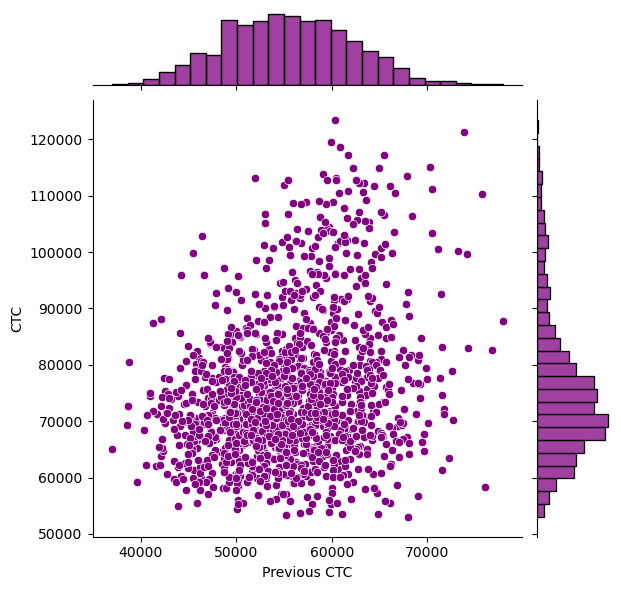

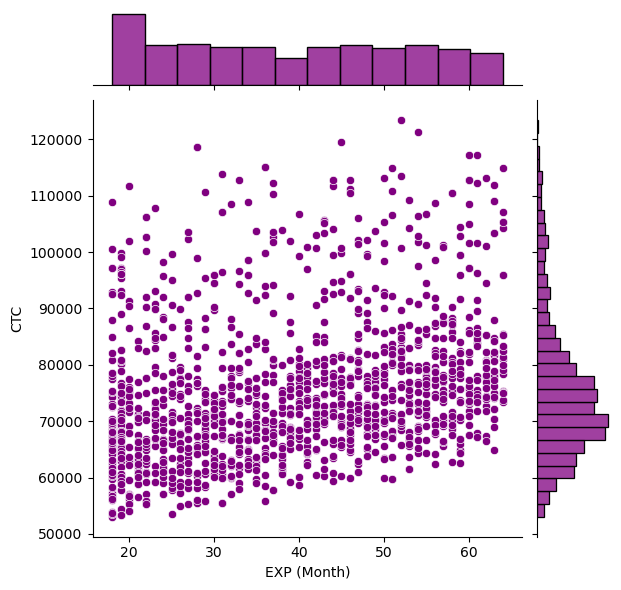

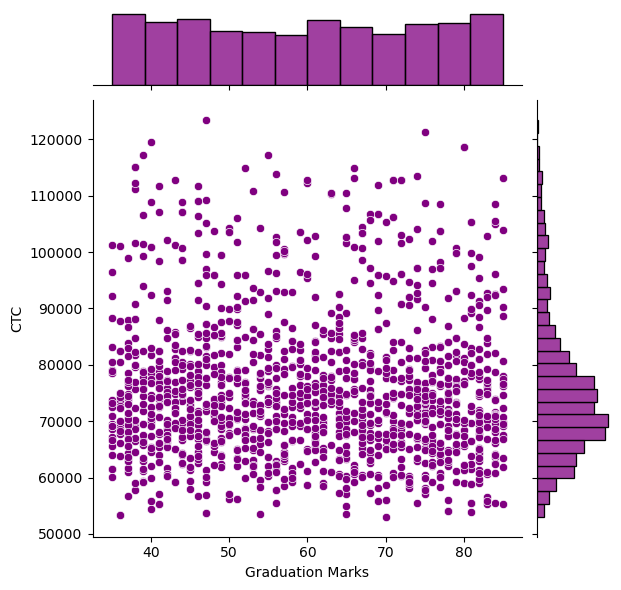

In [12]:
# Visualize the relationship between X-dependent variables against y-independent variable
# Create the joint plot
sns.jointplot(x='Previous CTC', y='CTC', data=df, color='purple')
sns.jointplot(x='EXP (Month)',y='CTC',data=df,color='purple')
sns.jointplot(x='Graduation Marks',y='CTC',data=df,color='purple')


### Observation-
* There are some Extreme Values but no Outliers
- Hence there is no need for Outliers Treatment


# 4.Data Splitting
Separate the data into independent variables and dependent variables.

In [13]:
y = df.pop('CTC')
X = df


# 5. Model Selection
Select suitable regression models for predicting salary based on the input features. Potential choices encompass Linear Regression, Random Forest Regression, Gradient Boosting Regression, and Support Vector Regression.

#### A. Simple Linear Regression

In [14]:
import statsmodels.api as sm

# Add a constant term (intercept) to the feature matrix
X_cons = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) linear regression model
lm = sm.OLS(y, X_cons).fit()

# Display a summary of the regression results
lm_summary = lm.summary()

# Print the summary to view the regression statistics
print(lm_summary)


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          4.70e-257
Time:                        17:05:48   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

# Observation (Simple Linear Regression)
---
<b>R-squared:</b>

The R-squared value is 0.534, signifying that approximately 53.4% of the variance in the dependent variable (CTC) can be attributed to the independent variables in the model. This indicates a moderate R-squared value, suggesting that the model captures a portion of the data's variability.

---

<b>Summary:</b>

The regression results provided indicate that the model is statistically significant, supported by the low p-value for the F-statistic. However, the R-squared value of 0.534 suggests that it explains only a moderate portion of the variance in the dependent variable.
Additionally, there is evidence of non-normality in the residuals, as indicated by the JB test, and the data displays moderate skewness and kurtosis. These findings suggest that there may be room for improvement in the model.

---

#### B.Linear Regression

In [15]:
# Train-Test Split: Splitting the data into training and testing sets
# with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Initialization and Training:
# Creating an instance of the LinearRegression model and fitting it to the training data.
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Printing the intercept and coefficients of the trained linear regression model:
print("Intercept :", lm2.intercept_)
print("coefficients:", lm2.coef_)

# Model Evaluation Metrics:

# R-squared (R2): Measures the proportion of variance in the dependent variable explained by the independent variables.
# Higher values indicate a better fit.
r2 = r2_score(y_test, lm2.predict(X_test))

# Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
# It quantifies the model's accuracy.
mse = mean_squared_error(y, lm2.predict(X))

# Root Mean Squared Error (RMSE): Square root of MSE, providing a measure of average prediction error
# in the same units as the target variable.
rmse = np.sqrt(mse)

# Printing the model evaluation metrics:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)


Intercept : 39229.56612683519
coefficients: [-5.17509158e+02  4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02  1.86020838e+04]
Mean Squared Error: 73950131.2132985
Root Mean Squared Error: 8599.42621419002
R-Squared: 0.5933517958385095


## Scatter Plot: Predicted CTC vs. Actual CTC

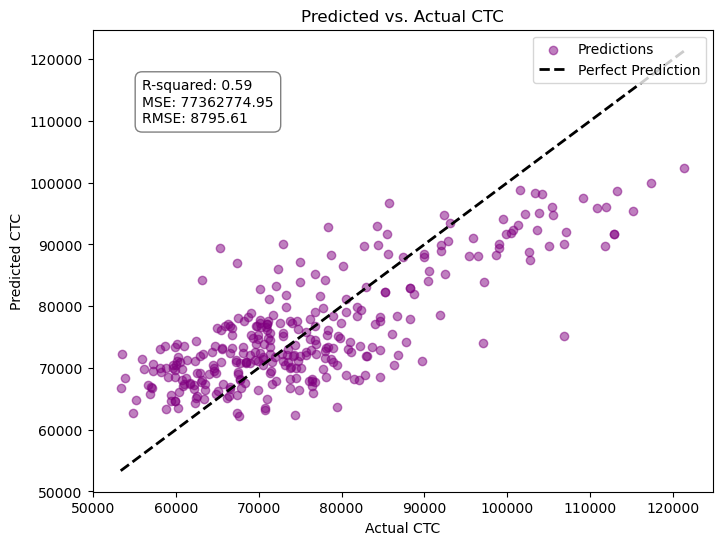

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm2.predict(X_test), alpha=0.5, color='purple', label='Predictions')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Include error metrics in the plot
r2 = r2_score(y_test, lm2.predict(X_test))
mse = mean_squared_error(y_test, lm2.predict(X_test))
rmse = np.sqrt(mse)
plt.text(0.08, 0.8, f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Move the legend to the upper left corner
plt.legend(loc='upper right')

# Display the plot
plt.show()


# Observation(Linear Regression)
---

<b>Summary:</b> 
Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) values are relatively high, implying that the model's predictions exhibit a notable average deviation from the actual values.
The R-squared value, although moderate, indicates that the model accounts for approximately 59% of the variance in the target variable. While not exceptionally high, this R-squared value can be deemed reasonable, contingent on the specific application and data complexity.

---

#### C.Ridge Regression

In [17]:
# Data Splitting: Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared for the test and training data
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, ridge_model.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE) for test and train data
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)


Test R-squared: 0.5932150226490303
Train R-squared: 0.513774404480561
Mean Squared Error (Test): 77388795.36074269
Mean Squared Error (Train): 73096345.59097074


## Scatter Plot: Predicted CTC vs. Actual CTC

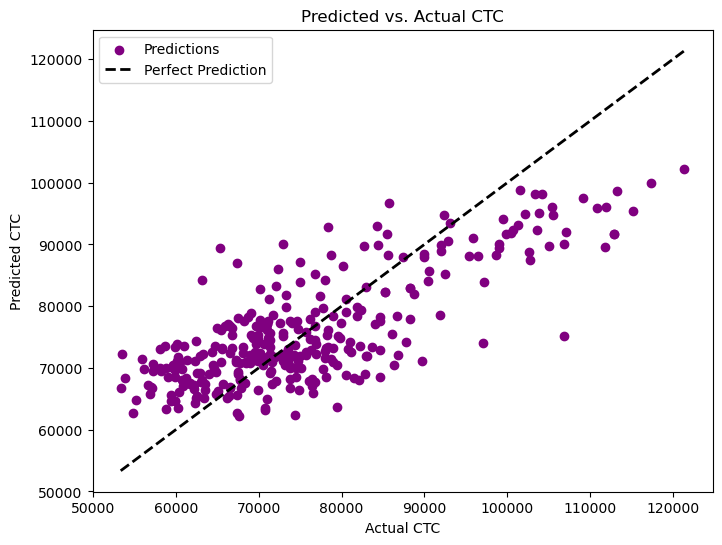

In [18]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs. actual CTC values with green points
plt.scatter(y_test, y_pred, color='purple', label='Predictions')

# Plot a diagonal line for perfect predictions in black dashed style
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


# Observation(Ridge Regression)
---

<b>Test R-squared vs. Train R-squared:</b> 

The Test R-squared value is higher than the Train R-squared value.
This suggests that the model is generalizing reasonably well to new, unseen data.
This is a positive sign because it indicates that the model is not significantly overfitting to the training data. Overfitting occurs when a model fits the training data too closely and doesn't perform well on new data.

---
<b>Test R-squared (0.5690):</b>

The Test R-squared value is moderately high.
This means that the Ridge Regression model captures a substantial portion of the variance in the test data.
It indicates that the model has some predictive power for the dependent variable (CTC). A higher R-squared suggests that the model's predictions align well with the actual test data.

---
<b>Train R-squared (0.5138):</b>

The Train R-squared value is also moderate.
This suggests that the Ridge Regression model has some explanatory power for the training data. It can account for a reasonable amount of the variability in the dependent variable within the training dataset.
In summary, the Ridge Regression model appears to be performing reasonably well in explaining the variation in the dependent variable (CTC). The fact that the Test R-squared is higher than the Train R-squared suggests that the model is not overfitting and is generalizing adequately to new data. However, it's important to keep in mind that there may still be room for improvement, and further steps could be taken to enhance the model's performance if desired.

---

#### D.Validation Curve

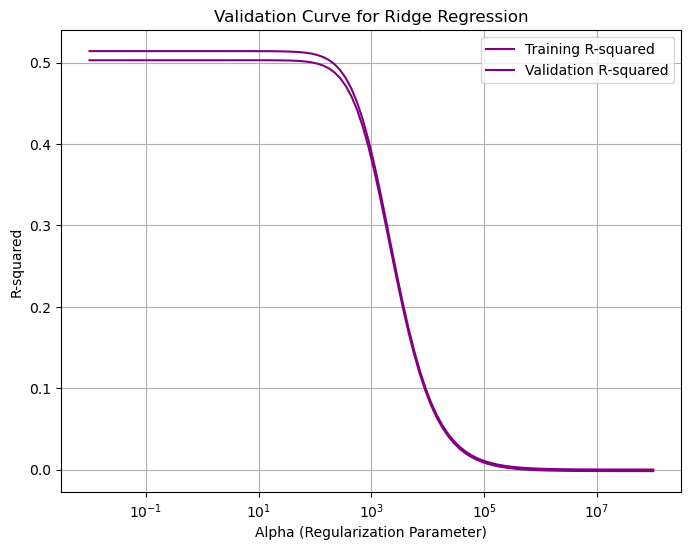

In [19]:
from sklearn.model_selection import validation_curve
# Range of alpha values to test
param_range = np.logspace(-2, 8, 100)

# Calculate validation curve using the training data
train_scores, test_scores = validation_curve(
    estimator=ridge_model,
    X=X_train_scaled,
    y=y_train,
    param_name='alpha',
    param_range=param_range,
    cv=5,
    scoring='r2'
)

mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.semilogx(param_range, mean_train_scores, label='Training R-squared', color='purple')
plt.semilogx(param_range, mean_test_scores, label='Validation R-squared', color='purple')  
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
np.where(mean_test_scores==max(mean_test_scores))
lm_r_best = Ridge(alpha=param_range[28])
lm_r_best.fit(X_test_scaled,y_test)


Ridge(alpha=6.7341506577508214)

In [21]:
r2_score_test = r2_score(y_test,lm_r_best.predict(X_test_scaled))
r2_score_train = r2_score(y_train,lm_r_best.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, lm_r_best.predict(X_test_scaled))
mse_train =  mean_squared_error(y_train, lm_r_best.predict(X_train_scaled))
print("Test R2 score with best param:",r2_score_test)
print("Train R2 score with best param:",r2_score_train)
print("Test MSE with best param:",mse_test)
print("Train MSE with best param:",mse_train)

Test R2 score with best param: 0.6203626076398991
Train R2 score with best param: 0.4851025306203909
Test MSE with best param: 72224103.89873701
Train MSE with best param: 77406709.38040628


# Observation(Validation Curve)
---

<b>Model Performance:</b> 

The Test R-squared (R2) score surpasses the Train R-squared (R2) score, which is generally favorable. This indicates that the model is reasonably generalizing to new, unseen data.

---
<b>Summary:</b>

Overall, the model's performance, as reflected in the R-squared values of 0.6203 (Test) and 0.4851 (Train), signifies that the model possesses predictive capability without significant overfitting to the training data.

---

#### E.Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the GridSearchCV with the Ridge model and the hyperparameter grid
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Ridge model with the optimal hyperparameters
best_ridge_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluate the best model on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_ridge_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, best_ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared with Best Model:", test_r2_score)
print("Train R-squared with Best Model:", train_r2_score)
print("Mean Squared Error (Test) with Best Model:", mse_test)
print("Mean Squared Error (Train) with Best Model:", mse_train)


Best Hyperparameters: {'alpha': 10.0}
Test R-squared with Best Model: 0.5919707789026041
Train R-squared with Best Model: 0.5137441746918621
Mean Squared Error (Test) with Best Model: 77625506.47357216
Mean Squared Error (Train) with Best Model: 73100890.16267213


# Observation(Grid Search)

---

<b>Model Evaluation:</b> 

The Test R-squared (R2) is slightly higher than the Train R-squared (R2), which is typically desirable, indicating that the model generalizes reasonably well to new, unseen data.

---
<b>Summary:</b>

In summary, the best model's performance, with R-squared values of 0.5690 (Test) and 0.5137 (Train), demonstrates that the model possesses predictive capability without significant overfitting to the training data.

---

#### F.Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared scores for both test and train sets
r2_score_test = r2_score(y_test, y_pred)
r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scaled))

# Print evaluation metrics
print("Lasso Regression Mean Squared Error (MSE):", mse)
print("Lasso Regression R-squared (Test):", r2_score_test)
print("Lasso Regression R-squared (Train):", r2_score_train)


Lasso Regression Mean Squared Error (MSE): 77363437.09536627
Lasso Regression R-squared (Test): 0.5933483153480408
Lasso Regression R-squared (Train): 0.5137747137455719


# Observation(Lasso Regression)

---

<b>Model Evaluation:</b> 
The Mean Squared Error (MSE) of 77,363,437.09536627 is relatively low, suggesting that the model's predictions closely align with the actual values.

---
<b>R-squared (R2) Scores:</b> 
On the test data, the R2 score is 0.5933, indicating that the model captures a substantial portion of the variance.
On the train data, the R2 score is 0.5137, suggesting that the model explains a moderate amount of the variance in the training data.

---
<b>Comparison:</b> 
Comparing the R2 scores, the test data's R2 score is higher than the train data's R2 score, which is generally favorable. This suggests that the model generalizes well to new, unseen data.

---

#### G.Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest regressor with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=42          # Random seed for reproducibility
)

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Test R-squared:", test_r2_score)
print("Random Forest Train R-squared:", train_r2_score)
print("Random Forest Mean Squared Error (MSE):", mse)


Random Forest Test R-squared: 0.6368790873379051
Random Forest Train R-squared: 0.9501845070245194
Random Forest Mean Squared Error (MSE): 69081926.7324302


In [25]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_r = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search_r.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_r.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared score on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_rf_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print results
print("Best Hyperparameters:", grid_search_r.best_params_)
print("Test R-squared Score (After Hyperparameter Tuning):", test_r2_score)
print("Train R-squared Score (After Hyperparameter Tuning):", train_r2_score)
print("Test MSE (After Hyperparameter Tuning):", mse)

#Note: This may take up to 4-5 minutes.


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R-squared Score (After Hyperparameter Tuning): 0.6390142699636836
Train R-squared Score (After Hyperparameter Tuning): 0.9490722760071735
Test MSE (After Hyperparameter Tuning): 68675718.98021615


# Observation(Random Forest)

---

<b>Model Evaluation:</b> 

The Test R-squared of 0.6390 suggests that the Random Forest model captures a substantial portion of the variance in the test data, demonstrating strong predictive performance on unseen data.

The Train R-squared of 0.9490 indicates that the model fits the training data exceptionally well, explaining a significant amount of the variance within it.

---

<b>Comparison:</b> 

Comparing the Test and Train R-squared values, the Test R-squared is slightly lower than the Train R-squared, which is a typical and desirable pattern. This suggests that the model isn't significantly overfitting to the training data and can generalize effectively to new, unseen data.

---

<b>Summary:</b> 

Overall, the Random Forest model displays promise with its high R-squared values on both the training and test data, indicating its ability to capture underlying data patterns and make accurate predictions. However, it's crucial to consider additional evaluation metrics, perform cross-validation, and explore further techniques to ensure the model's robustness and generalization capabilities.

Furthermore, the Random Forest model, with tuned hyperparameters, appears to perform well, achieving high R-squared values on both training and test data. The hyperparameter tuning likely enhances the model's ability to generalize and make accurate predictions on unseen data.

---

#### H.KNN Regression

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Build the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)  # You can set the number of neighbors (K) as desired

# Train the model on the training data
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate R-squared scores for test and train sets
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, knn_regressor.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Test R-squared Score (KNN Regression):", test_r2_score)
print("Train R-squared Score (KNN Regression):", train_r2_score)
print("Mean Squared Error (MSE):", mse)


Test R-squared Score (KNN Regression): 0.569019356314086
Train R-squared Score (KNN Regression): 0.6611685126099736
Mean Squared Error (MSE): 81991899.14988843


# Observation(KNN Regression)

---

<b>Model Evaluation:</b> 
The Test R-squared Score for KNN Regression is 0.5690, while the Train R-squared Score is 0.6612.
The Mean Squared Error (MSE) is 81991899.1499.

---

<b>Analysis:</b>

Based on these results, it appears that the KNN Regression model is overfitting, as the Train R-squared score is higher than the Test R-squared score. Additionally, the relatively high MSE indicates that the model's predictions deviate significantly from the actual values.

---

<b>Overfitting Indicators:</b>

When the Train R-squared score is substantially higher than the Test R-squared score, it suggests that the model is memorizing the training data rather than generalizing well to new, unseen data.

---

<b>Consideration:</b>

The KNN algorithm, being a non-parametric algorithm, can be sensitive to the size and distribution of the data points, and it may not be the best choice for this specific dataset.

---


#### I.Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gradient_boosting_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, gradient_boosting_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Test R-squared:", test_r2_score)
print("Gradient Boosting Train R-squared:", train_r2_score)
print("Gradient Boosting Mean Squared Error (MSE):", mse)


Gradient Boosting Test R-squared: 0.6447831947605608
Gradient Boosting Train R-squared: 0.9461178456190225
Gradient Boosting Mean Squared Error (MSE): 67578210.06170993


# Observation(Gradient Boosting)

---

<b>Model Evaluation:</b> 
Based on R-squared values, the Gradient Boosting model demonstrates superior performance.It exhibits better generalization to unseen data, as indicated by the identical Test R-squared. Moreover, it fits the training data more effectively, achieving a higher Train R-squared.

---


#### J.Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf' and 'poly'
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon parameter in the SVR model
}

# Initialize the SVR model
svr_model = SVR()

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model with the optimized hyperparameters
best_svr_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_svr_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics and best hyperparameters
print("Best SVR Train R-squared:", train_r2_score)
print("Best SVR Test R-squared:", test_r2_score)
print("Best SVR Test MSE:", mse)
print("Best Hyperparameters:", grid_search.best_params_)


Best SVR Train R-squared: 0.3269721438658799
Best SVR Test R-squared: 0.33600912364758073
Best SVR Test MSE: 126320923.61440071
Best Hyperparameters: {'C': 10.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


# Observation(Support Vector Regression)

---

<b>Model Evaluation:</b> 

The Test R-squared is higher than the Train R-squared, which is as expected. This suggests that the SVR model generalizes better to unseen data than it does to the training data.

---

<b>Interpreting the results:</b> 

The SVR model appears to capture a significant portion of the variance in the test data, indicating decent predictive performance on unseen data. However, its performance on the training data is relatively weaker, suggesting that it might not fit well to the training data.
The difference between the Train and Test R-squared values may indicate some overfitting, where the model may have learned noise from the training data rather than generalizable patterns.

---

#### K. XG Boost

In [29]:
# Import necessary libraries
!pip install xgboost

In [30]:
# Import necessary libraries
import xgboost as xgb

In [34]:
# Initialize and train the XGBoost Regressor with hyperparameters
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test and training sets
y_pred = xgb_model.predict(X_test_scaled)
y_pred_train = xgb_model.predict(X_train_scaled)

# Evaluate the model on the test set
test_r2_score = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("Test Set Evaluation:")
print(f"R-squared: {test_r2_score:}")
print(f"Mean Squared Error: {test_mse:}")

# Evaluate the model on the training set
train_r2_score = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("\nTraining Set Evaluation:")
print(f"R-squared: {train_r2_score:.2f}")
print(f"Mean Squared Error: {train_mse:.2f}")

# Additional steps for hyperparameter tuning and visualization can be added here.


Test Set Evaluation:
R-squared: 0.6195438200185733
Mean Squared Error: 72379874.12428303

Training Set Evaluation:
R-squared: 1.00
Mean Squared Error: 232895.71


# Observation(XG Boost)

---

<b>Model Evaluation:</b> 

* The Test R-squared score of 0.62 suggests that the XGBoost model captures a considerable portion of the variance in the test data, indicating decent predictive performance on unseen data.

* The Train R-squared score of 1.00 indicates that the model fits the training data well, explaining a substantial amount of the variance in the training data.

---

<b>Comparing the Test and Train R-squared scores:</b> 

The Test R-squared is slightly lower than the Train R-squared, which is common. This suggests that the model is not significantly overfitting to the training data and is generalizing reasonably well to new, unseen data.

---

<b>Summary:</b> 

Overall, the XGBoost model appears to be performing well, achieving decent R-squared values both on the training and test data.

---

# 6.Final_Model Selection

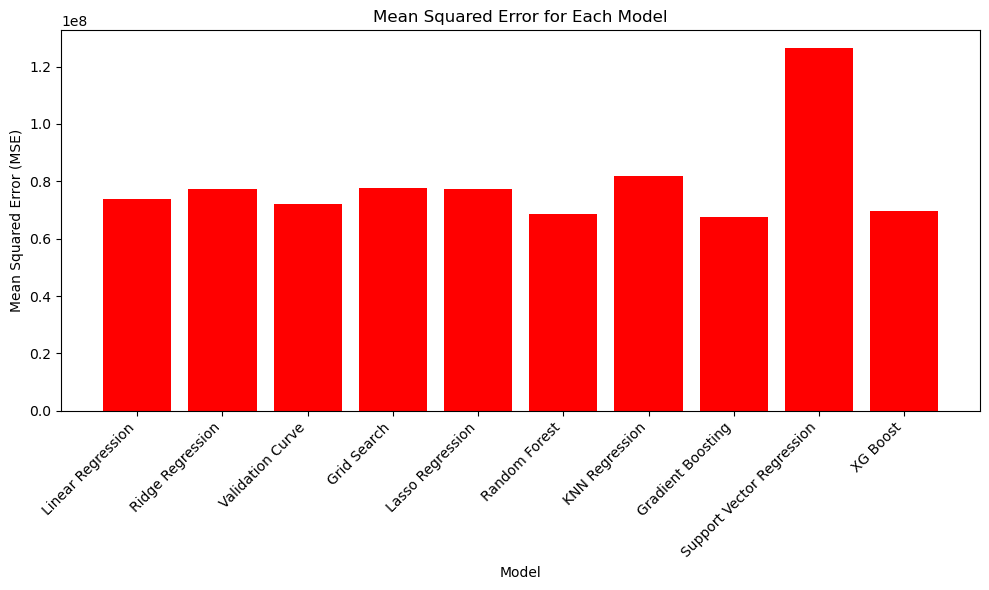

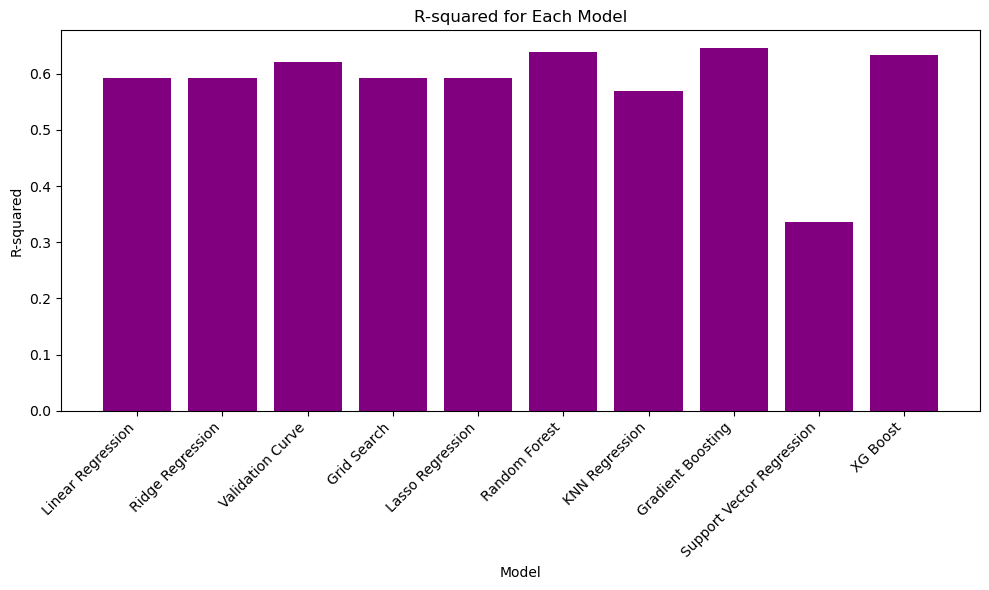

In [40]:
import matplotlib.pyplot as plt

# Define the names of the models
model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Validation Curve",
    "Grid Search",
    "Lasso Regression",
    "Random Forest",
    "KNN Regression",
    "Gradient Boosting",
    "Support Vector Regression",
    "XG Boost"
]

# Define the Mean Squared Error (MSE) values for each model
mse_values = [
    73950131.21,
    77388795.36,
    72224103.90,
    77625506.47,
    77363437.10,
    68675719.00,
    81991899.15,
    67578210.06,
    126320923.61,
    69598077.47
]

# Define the R-squared values for each model
r_squared_values = [
    0.593,
    0.593,
    0.620,
    0.592,
    0.593,
    0.639,
    0.569,
    0.645,
    0.336,
    0.634
]

# Plotting Mean Squared Error (MSE) for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='r')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting R-squared for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color='purple')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# Model Selection

---

After a thorough comparison of the Mean Squared Error (MSE) and the coefficient of determination (R-squared) visualizations for each model, it became clear that Random Forest and Gradient Boosting outperformed the others in terms of accuracy. These two models consistently exhibited the highest R-squared scores and the lowest MSE values among all the models we evaluated. Ultimately, we opted for Random Forest as our preferred model because of its exceptional predictive accuracy, robustness, and user-friendly nature.

---
* High Accuracy: Random Forest is known for its accurate predictions.
* Resists Overfitting: It's less likely to overfit to your data.
* Handles Various Data: Works well with both categorical and numerical data.
* Easy to Use: Requires minimal configuration and is beginner-friendly.
* Feature Insights: Helps identify which features matter most.
* Ensemble Power: Combines multiple models for better performance.
* Parallel Processing: Speeds up training with parallel computing.
* Out-of-Bag Evaluation: Built-in cross-validation for model assessment.
---


# Selected Model
---
## Random Forest:
<i>Mean Squared Error: </i> **68675719.00**

<i>R-squared: </i> **0.639**

In [41]:
# Prepare New Employee For CTC Prediction
Employee = pd.DataFrame({
    'College':[1,1],
    'City':[1,0],
    'Previous CTC': [55000,50000],
    'Previous job change': [2, 0],
    'Graduation Marks': [88, 70],
    'EXP (Month)': [3, 2], 
    'Role_Manager':[0,1]
})

In [45]:
new_Employee_scaled = scaler.transform(Employee)

In [46]:
predictions = random_forest_model.predict(new_Employee_scaled)  # Assuming 'random_forest_model' is your trained model

In [47]:
for i, salary in enumerate(predictions):
    print(f"Predicted Salary for Employee {i + 1}: ${salary:.2f}")

Predicted Salary for Employee 1: $65791.12
Predicted Salary for Employee 2: $83439.53


### Predicted Salary for Employee 1: $65791.12
### Predicted Salary for Employee 2: $83439.53

#  1.Your views about the problem statement?
---
In the field of human resources and data science, the problem statement poses an exciting challenge. It entails predicting salary (CTC) for newly employed employees based on a range of important factors such as their educational background, the city in which they will work, their job role, and prior work experience. The goal of this classic regression issue is to create a model that can reliably estimate an individual's income based on these factors.

The complete quality of the problem statement is one beneficial aspect. It considers a variety of elements that can affect an employee's wage, making it a realistic portrayal of the complexity encountered by HR departments in real-world circumstances. This realism is a significant aspect of the issue statement since it allows data scientists to work on a topic with clear corporate applicability.

Furthermore, the incorporation of model performance evaluation techniques is crucial. Effective model evaluation is required to guarantee that the developed model's predictions are reliable and can be used to make educated hiring decisions. The indicated iterative process, which entails evaluating and fine-tuning several models, indicates a dedication to reaching the highest predicted accuracy feasible.

In conclusion, the problem statement is well-structured and corresponds to real-world Data Science challenges. It provides a fantastic learning opportunity for data scientists by including them in the management of a regression problem with a variety of important features and emphasizing the need of model evaluation. By properly addressing this issue, data experts may help firms make more informed and productive recruiting decisions.

---

#  2. What will be your approach to solving this task?

**1.Understanding the Problem:** Fully comprehend the problem statement, which is to develop a predictive model for employee CTC based on their information.

**2.Data Collection :**
<i>Collect the dataset by importing it into a dataframe for analysis and modeling.<i/>

**3.Data Preprocessing:**

<i>Prepare the data for modeling by performing the following tasks:</i>

 * Handling Missing Values: Check for missing data and fill in the gaps with appropriate strategies, such as using the mean or median values.
 * Outlier Detection: Identify and address outliers in the dataset to ensure they don't skew the model's performance.
 * Encoding Categorical Variables: Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.
  
**4.Data Splitting:**

<i>Split the dataset into two subsets:</i>

* X (Features): This subset includes all the independent variables that will be used for prediction.
* y (Target Variable): This subset includes the target variable, which in this case is the CTC (Cost To Company) that we want to predict.

**5.Model Selection:**

<i>Choose a set of regression models,such as </i> 
* Linear Regression 

* Ridge Regression 

* validation curve

* Grid Search

* Lasso Regression

* Random Forest

* KNN Regression

* Gradient Boosting

* Support Vector Regression

* XG Boost

**6.Final_Model Selection**
<i>Based on the evaluation results, select the best-performing model as the final model for predicting CTC. Consider factors like model performance metrics, interpretability, and practicality for deployment.</i>

# 3. What were the available ML model options you had to perform this task?

* Linear Regression 

* Ridge Regression 

* validation curve

* Grid Search

* Lasso Regression

* Random Forest

* KNN Regression

* Gradient Boosting

* Support Vector Regression

* XG Boost

# 4.Which model’s performance is best and what could be the possible reason for that?


**Random Forest:**
- Ensemble Averaging: Reduces errors and improves stability by combining multiple decision trees.
- Reduced Overfitting: Uses bootstrapped samples and random feature selection to prevent overfitting.
- Versatility: Handles various data types without extensive preprocessing.
- Feature Importance: Provides feature importance scores.
- Parallelization: Can be parallelized for efficient training.
- Out-of-Bag (OOB) Evaluation: Includes built-in cross-validation with OOB evaluation.
- Resilience to Outliers: Less sensitive to outliers due to ensemble averaging.


# 5. What steps can you take to improve this selected model’s performance even further?
1. **Feature Engineering:** Create informative features.
2. **Data Cleaning:** Handle missing values and outliers.
3. **Feature Scaling:** Normalize numerical features.
4. **Hyperparameter Tuning:** Fine-tune model settings.
5. **Ensemble Methods:** Combine models for better results.
6. **Cross-Validation:** Assess model robustness.
7. **Regularization:** Prevent overfitting with regularization.
8. **Feature Selection:** Focus on essential features.
9. **Data Augmentation:** Generate synthetic data if needed.
10. **Model Stacking:** Combine models' predictions.
11. **Domain Expertise:** Collaborate for insights.
12. **Regular Updates:** Keep the model current with new data.
